In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\ADMIN\Documents\Data analysis\crop_production.csv")
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [5]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [6]:
df.size

1722637

In [7]:
nr, nc = df.shape
print(nr, nc)

246091 7


In [8]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [9]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [10]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
for i in df.columns:
    print(i, " ", df[i].unique())

State_Name   ['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
District_Name   ['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAON' 'CACHAR' 'CHIRANG' 'DARRANG' 

In [13]:
state_budget = df.groupby('State_Name')['Production'].sum()
state_budget = state_budget.sort_values(ascending=False)

<Axes: xlabel='Production', ylabel='State_Name'>

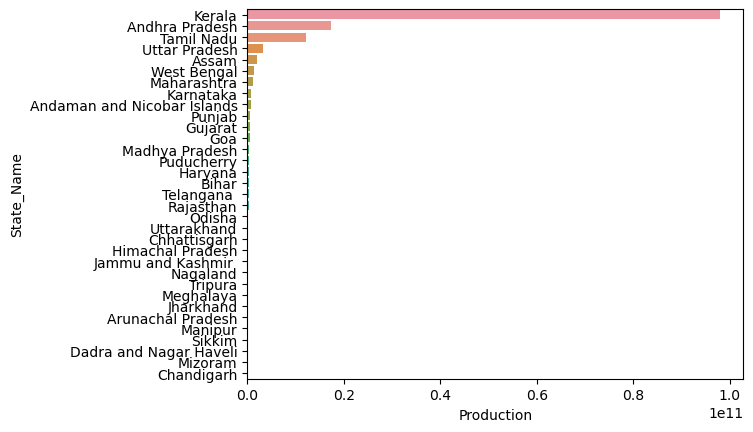

In [14]:
plt.xlabel('Production')
sns.barplot(x=state_budget.values, y=state_budget.index)

In [15]:
crops_budget = df.groupby('Crop')['Production'].sum()
crops_budget = crops_budget.sort_values(ascending=False)

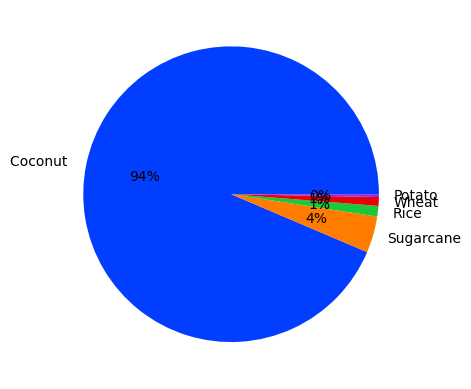

In [16]:
palette_color = sns.color_palette('bright')
plt.pie(crops_budget[:5].values, labels=crops_budget[:5].index, colors=palette_color, autopct='%.0f%%')
plt.show()

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Crop_Year', ylabel='Production'>

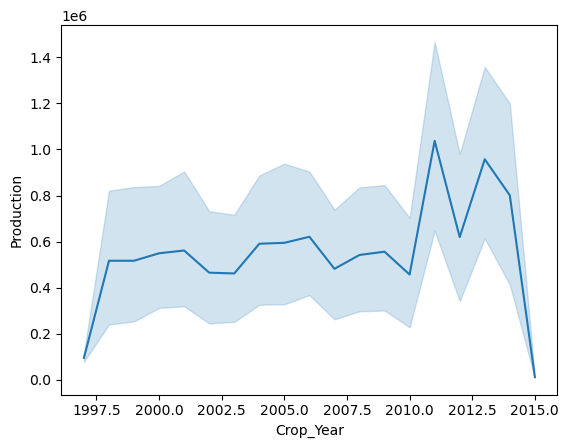

In [17]:
sns.lineplot(x=df['Crop_Year'], y=df['Production'])

In [18]:
top_crops = df.groupby('Crop')['Production'].sum().reset_index()
top_crops_sorted = top_crops.sort_values(by='Production', ascending=False)
top_10_crops = top_crops_sorted[0:10]

In [19]:
top_10_crops

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08
33,Cotton(lint),2.970000e+08
59,Maize,2.733418e+08
49,Jute,1.815582e+08
7,Banana,1.461327e+08
105,Soyabean,1.418372e+08


In [20]:
grouped_df = df.groupby(['State_Name', 'Crop'])['Production'].sum().reset_index()
top_10_crops = grouped_df[grouped_df['Crop'].isin(top_10_crops['Crop'])]

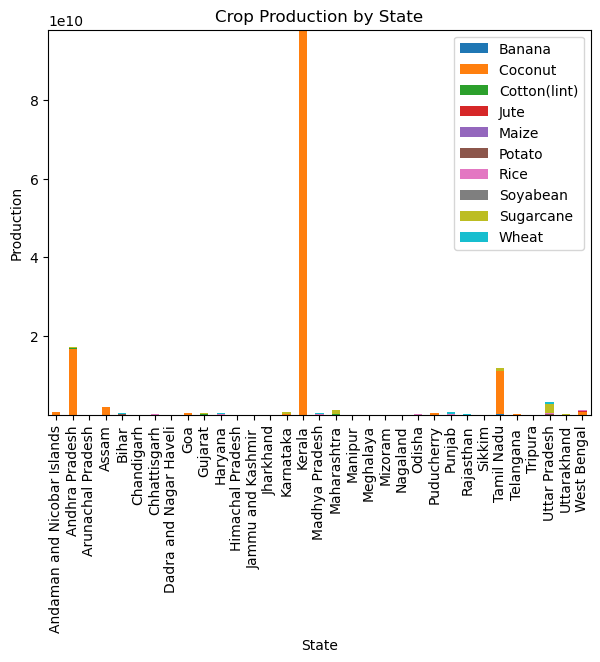

In [21]:
pivot_df = top_10_crops.pivot(index='State_Name', columns='Crop', values='Production')
pivot_df.plot(kind='bar', stacked=True, figsize=(7, 5))
plt.xlabel('State')
plt.ylabel('Production')
plt.title('Crop Production by State')
plt.legend()
plt.show()

In [22]:
season_budget = df.groupby('Season')['Production'].sum()
season_budget = season_budget.sort_values(ascending=False)

<Axes: xlabel='Season'>

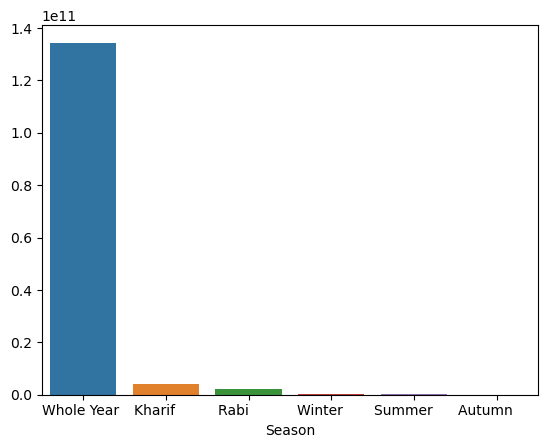

In [23]:
sns.barplot(y=season_budget.values, x=season_budget.index)